<a href="https://colab.research.google.com/drive/1qNHS17worh3kbtc3xBZI6boWpeU1aYuT?usp=sharing#scrollTo=_EuG70ls-o5p" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Auto-TikTok Title Generation Bots Demo**
This is Yival's new feature to auto-tik-tok title generation bots. With just two lines of input. The task we want to achieve here is to generate our short TikTok video title based on different video content summary and target audience.

# **Install the latest yival with git**

We provide two ways of yival install

1. Install with pip
```
pip install yival
```

2. Developer Mode: The latest yival
```
git clone https://github.com/YiVal/YiVal.git
poetry config virtualenvs.create true
poetry install
```

Here we install with poetry, you can find the detail below
* install poetry in colab environment
* install yival with poetry

In [ ]:
# clone the latest yival
import os
!python --version
!rm -rf YiVal
!git clone https://github.com/YiVal/YiVal.git

# install and config poetry
import shutil
!pip install poetry
POETRY_PATH = shutil.which("poetry") or (os.getenv("HOME") + "/.local/bin/poetry")
os.environ["PATH"] += os.pathsep + os.path.dirname(POETRY_PATH)
!poetry --version
!poetry config virtualenvs.create true

In [ ]:
os.chdir("/content/YiVal")
!poetry install --no-ansi

In [ ]:
!pip install openai requests

# **Configure your OpenAI API key**

We primarily use ChatGPT and GPT-4 as data_generator, evaluator , improver, etc.


In [ ]:
os.environ['OPENAI_API_KEY'] = ''

## **[Optional] Change gpt-4 to gpt-3.5-turbo in config**

If you don't have a GPT-4 account, you can also use GPT-3.5-turbo to complete the entire process, you just need to modify the **model_name** in the config file.

For example , you can find `model_name` below

```yaml
description: Generate test data
dataset:
  data_generators:
    openai_prompt_data_generator:
      chunk_size: 100000
      diversify: true
      model_name: gpt-4 #Change the model_name to gpt-3.5-turbo here 🦄️
      input_function:
        description:
          Given a tech startup business, generate a corresponding landing
          page headline
        name: headline_generation_for_business
        parameters:
          tech_startup_business: str
      number_of_examples: 3
      output_csv_path: generated_examples.csv
  source_type: machine_generated
```

If you want to use gpt-3.5-turbo, change the `use_gpt_35_turbo` to `True` in the below cell and run it, after you save your configurations below the `/demo/configs` folder.

It will autotimatically replace all `gpt-4` to `gpt-3.5-turbo` in all yamls provided by yival

In [ ]:
import os, glob, yaml
use_gpt_35_turbo = True  #change it to True if you don't want to use gpt-4

def replace_gpt4_recursive(data):
    if isinstance(data, str):
        return data.replace('gpt-4', 'gpt-3.5-turbo')
    elif isinstance(data, list):
        return [replace_gpt4_recursive(item) for item in data]
    elif isinstance(data, dict):
        return {key: replace_gpt4_recursive(value) for key, value in data.items()}
    else:
        return data


def replace_in_yaml_files(directory):
    for filename in glob.glob(os.path.join(directory, '*.yml')):
        with open(filename, 'r') as file:
            data = yaml.safe_load(file)
        data = replace_gpt4_recursive(data)
        with open(filename, 'w') as file:
            yaml.safe_dump(data, file)

if use_gpt_35_turbo:
  replace_in_yaml_files("/content/YiVal/demo/configs")
  print("[INFO] replace all gpt-4 to gpt-3.5-turbo. Use gpt-3.5-turbo in the coming page")
else:
  print("[INFO] use default gpt-4")

#**[Optional]Configure your Ngrok token**
Our current ngrok authtoken only supports one public session at a time. If it's being used by others or if you're using it to run multiple Colabs at once, you might bump into a Network error. To avoid this, we suggest getting your own ngrok authtoken for your Colab notebooks. It's easy and free to get your own authtoken from ngrok.

Here's how to do it:
- If you don't have a ngrok account yet, head over to https://dashboard.ngrok.com/login to sign up.
- Once you're logged in, you can grab your authtoken at https://dashboard.ngrok.com/get-started/your-authtoken.

Prior to initiating a new demo, ensure that all other applications utilizing ngrok within Colab have been terminated via the `Connect -> Manage Sessions` pathway. You can check and manage your sessions as follow picture.

<img src="https://github.com/uni-zhuan/uni_CDN/blob/master/picture/Yival/iShot_2023-10-12_22.51.49.png?raw=true" width="80%" height="50%">


In [ ]:
os.environ['ngrok']='true'
!pip install pyngrok
from pyngrok import ngrok

os.environ['ngrok']='true'
public_url = ngrok.connect(addr = 8501)
!poetry run ngrok config add-authtoken [your_ngrok_authroken]

# Multi-model Run YIVAL !

Now that you are familiar with the different components of Yival 🧰

Run it completely to experience all of its features🚀.

**Click the ngrok below** instead of `localhost:8073` since we're going to use ngrok

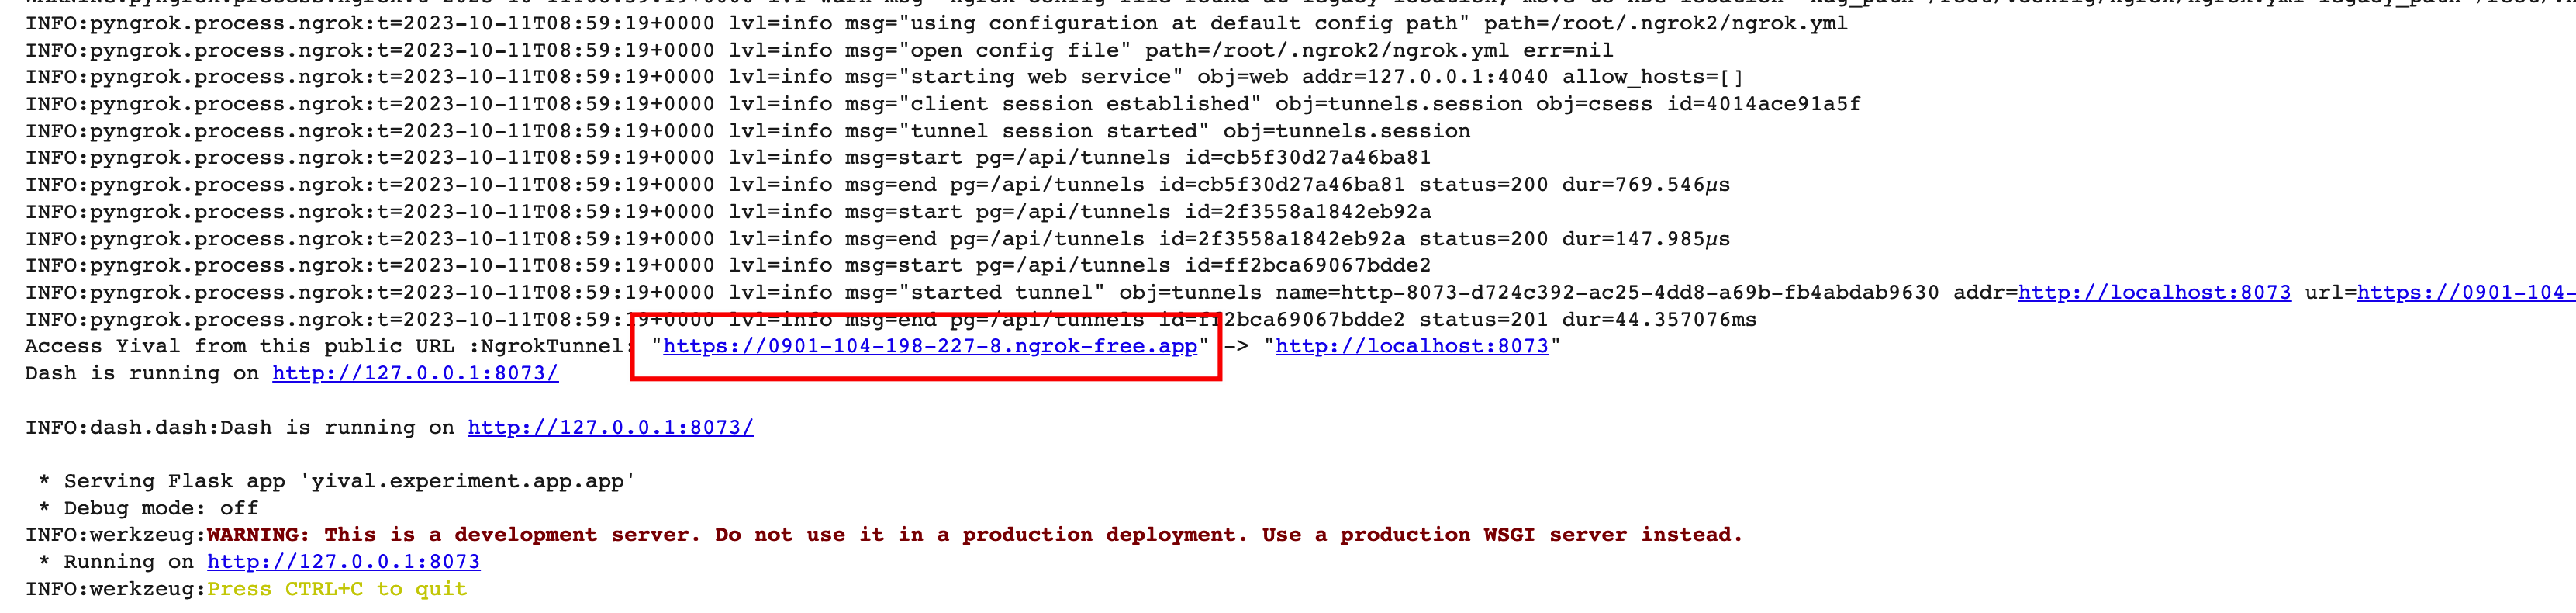

# **Input Usage**

[1] What task would you like to set up?: **generate a short tiktok video title**

[2] Provide input for the task, separated by comma. For example: 'team' or ...: **content_summary,target_audience.**

[3] Please provide evaluation aspects (optional): **emoji,one_sentence**

**Attentions:** In step 2 and 3, the sentences need to be separated by underscores(_) instead of spaces( ).

In [ ]:
!poetry run python src/yival/auto_prompt/main.py

# **Results**
In this section, we will explain the results.

## Experiment Results Analysis
<img src="https://api2.mubu.com/v3/document_image/ac945905-c1a9-4d66-9c8f-851e001b5c93-2762634.jpg">

<img src="https://api2.mubu.com/v3/document_image/08efb704-5883-4beb-a68b-31b5dcf4aeb8-2762634.jpg">

## Detailed Experiment Results

<img src="https://api2.mubu.com/v3/document_image/ab0ce2bd-8399-421a-b04a-ab5269db941c-2762634.jpg">

<img src="https://api2.mubu.com/v3/document_image/1f530db3-f3b0-4970-9353-7537c8f09cf7-2762634.jpg">

## Enhancer Experiment Results Analysis

There are 4 iteractions, corresponding to the four phases of the **optimize_by_prompt_enhancer**.

<img src="https://api2.mubu.com/v3/document_image/0d7bcb67-0dba-4579-a065-cc861d67df2e-2762634.jpg">

<img src="https://api2.mubu.com/v3/document_image/8b436c37-2156-4a20-b0fb-045a3160acd9-2762634.jpg">

<img src="https://api2.mubu.com/v3/document_image/0edeb763-fa6c-46c3-bcb9-b322e3a0b07d-2762634.jpg">

<img src="https://user-images.githubusercontent.com/71804564/280794486-9f879957-938c-4cc8-8e0b-ff63741829b8.jpeg">

## Enhancer Detailed Experiment Results

<img src="https://api2.mubu.com/v3/document_image/d724faf8-683b-40f4-b1ce-09cfbbae8d5e-2762634.jpg">

## Use Best Combinations

In this part, you can input customized task and kwargs to generate results. But the result is based on previous tasks.

<img src="https://api2.mubu.com/v3/document_image/83882beb-d052-4075-8a49-c46e6900f2d4-2762634.jpg">
